In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [41]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)


In [42]:
batch = 32
img_height = 150
img_width = 150

In [43]:
train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset = 'training',
seed = 120,
image_size = (img_height,img_width),
batch_size=batch)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [44]:
val_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset='validation',
seed = 80,
image_size=(img_height,img_width),
batch_size=batch)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [45]:
names = train_ds.class_names
print(names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [46]:
for img, labels in train_ds:
    print(img.shape)
    print(labels.shape)
    break

(32, 150, 150, 3)
(32,)


In [47]:
len(names)

5

In [48]:
model = models.Sequential([
    layers.Rescaling(1/255,input_shape= (img_height,img_width,3)),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(5)
])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)       

In [50]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [51]:
output = model.fit(train_ds,validation_data=val_ds,epochs = 5)

Epoch 1/5
92/92 [==============================] - 109s 1s/step - loss: 1.2442 - accuracy: 0.4714 - val_loss: 1.0014 - val_accuracy: 0.6253
Epoch 2/5


2023-04-18 00:43:29.175821: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1 of 256
2023-04-18 00:43:32.330711: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


92/92 [==============================] - 95s 820ms/step - loss: 0.9669 - accuracy: 0.6114 - val_loss: 0.8489 - val_accuracy: 0.6744
Epoch 3/5
92/92 [==============================] - 72s 771ms/step - loss: 0.8299 - accuracy: 0.6710 - val_loss: 0.7392 - val_accuracy: 0.7098
Epoch 4/5
92/92 [==============================] - 83s 895ms/step - loss: 0.7008 - accuracy: 0.7282 - val_loss: 0.6323 - val_accuracy: 0.7698
Epoch 5/5
92/92 [==============================] - 69s 747ms/step - loss: 0.5574 - accuracy: 0.7858 - val_loss: 0.5113 - val_accuracy: 0.8161


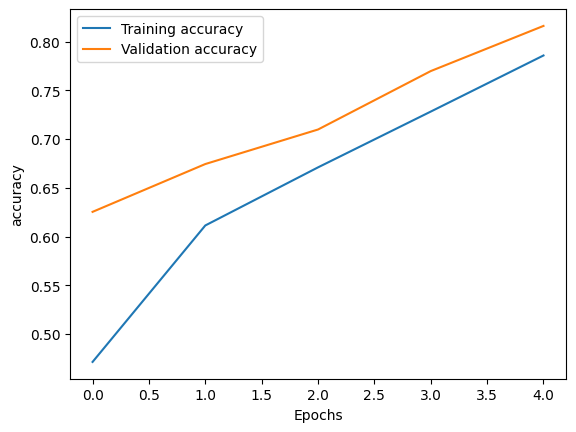

In [52]:
plt.plot(output.history['accuracy'],label = 'Training accuracy')
plt.plot(output.history['val_accuracy'],label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc = 'upper left')
plt.show()


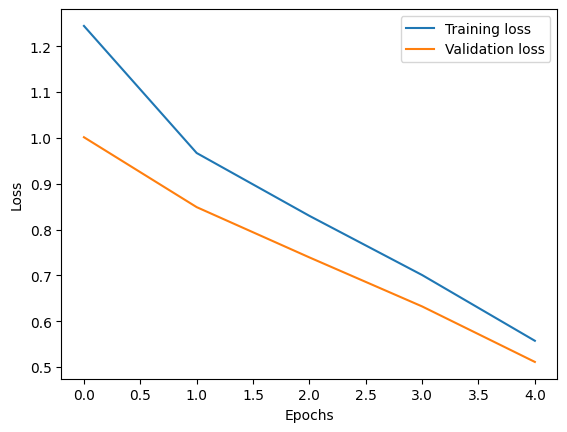

In [53]:
plt.plot(output.history['loss'], label = 'Training loss')
plt.plot(output.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

In [54]:
test_loss, test_acc = model.evaluate(val_ds,verbose = 1)

23/23 [==============================] - 5s 209ms/step - loss: 0.5113 - accuracy: 0.8161


In [55]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 252ms/step
This image most likely belongs to sunflowers with a 99.64 percent confidence.
